<a href="https://colab.research.google.com/github/ngoan22mse23088/GraduationThesis/blob/master/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install opencv-python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


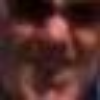

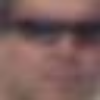

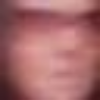

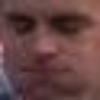

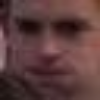

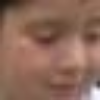

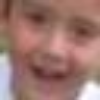

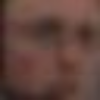

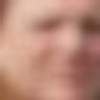

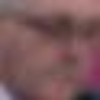

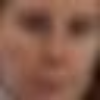

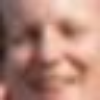

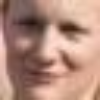

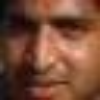

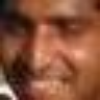

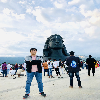

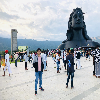

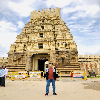

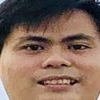

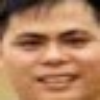

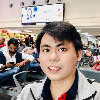

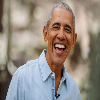

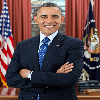

Predicted Label: 9999_1
Predicted Probabilities: [0.06000254 0.05273528 0.02791704 0.03503757 0.03137826 0.08723853
 0.03639023 0.0236679  0.0319265  0.03844222 0.03230451 0.03886264
 0.03354802 0.05361219 0.04626919 0.0289506  0.04962714 0.04342583
 0.0472005  0.0631489  0.04136627 0.03678851 0.06015964]


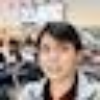

img_find_path: /content/drive/MyDrive/Training_Set/9999/9999_1.jpg


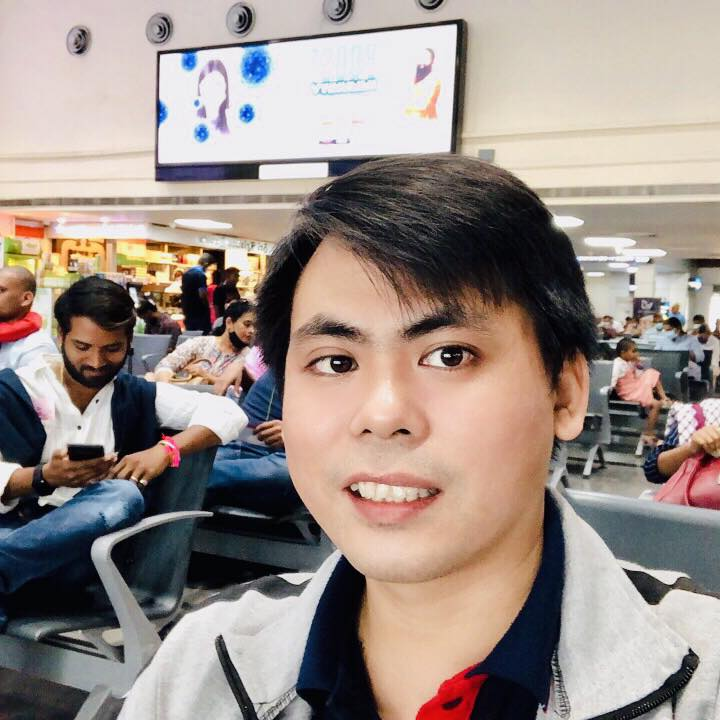

In [61]:
import numpy as np
import cv2
import os
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
from google.colab import drive

# Load the dataset
drive.mount('/content/drive')
data = []
labels = []
root_dir = '/content/drive/MyDrive/Training_Set'

# Iterate through all subdirectories in the root directory
for subdir in os.listdir(root_dir):
  # Get the path to the current subdirectory
  dataset_path = os.path.join(root_dir, subdir)
  for file_name in os.listdir(dataset_path):
      # Create the full path to the image
      img_path = os.path.join(dataset_path, file_name)

      try:
          # Read the image
          img = cv2.imread(img_path)

          # Check if the image is loaded successfully
          if img is None:
              raise Exception(f"Error: Unable to read the image at {img_path}")

          # Resize the image
          img = cv2.resize(img, (100, 100))

          # Show the new image
          cv2_imshow(img)

          # Flatten and append the image data
          data.append(img.flatten())

          # Extract the label from the file name
          labels.append(file_name.split('.')[0])

      except Exception as e:
          print(f"Error processing image: {img_path}")
          print(f"Exception: {e}")

# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Train the SVM model with probability estimates enabled
model = SVC(kernel='linear', C=1.0, probability=True)
model.fit(data, encoded_labels)

# Predict the label and probability of a new image
new_img_path = '/content/drive/MyDrive/test/9999_7.jpg'
img_find_path = '/content/drive/MyDrive/Training_Set/'

try:
    # Read and resize the new image
    new_img = cv2.imread(new_img_path)

    new_img = cv2.resize(new_img, (100, 100))

    # Show the new image
    # cv2_imshow(new_img)

    if new_img is None:
        raise Exception(f"Error: Unable to read the new image at {new_img_path}")

    # Flatten the new image
    new_img_flat = new_img.flatten()

    # Predict class label
    predicted_label = model.predict([new_img_flat])[0]

    # Predict probability
    predicted_probabilities = model.predict_proba([new_img_flat])[0]

    # Convert the predicted label back to the original class label
    predicted_label_original = label_encoder.inverse_transform([predicted_label])[0]

    # Display results
    print(f"Predicted Label: {predicted_label_original}")
    print(f"Predicted Probabilities: {predicted_probabilities}")

    # Show the new image
    cv2_imshow(new_img)

    img_find_path += predicted_label_original[:4] + '/' + predicted_label_original + '.jpg'
    print(f"img_find_path: {img_find_path}")

    img_find = cv2.imread(img_find_path)
    cv2_imshow(img_find)

except Exception as e:
    print(f"Error processing new image: {new_img_path}")
    print(f"Exception: {e}")
